# Homework — Stage 10a: Linear Regression

Use this as a scaffold if your project data isn’t ready. Replace the synthetic data section with your dataset when possible.

In [17]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
import scipy.stats as st

sns.set()
np.random.seed(7)

## 1) Synthetic data (replace with your project data when ready)
- Finance-flavored factors and asset excess return
- Includes a quadratic effect to motivate specification checks

In [18]:
n = 200
dates = pd.bdate_range(start="2024-02-01", periods=n)
mkt_excess = np.random.normal(0, 0.011, size=n)
size = np.random.normal(0, 0.008, size=n)
value = np.random.normal(0, 0.009, size=n)
momentum = np.random.normal(0, 0.006, size=n)

beta0, beta_mkt, beta_size, beta_value, beta_mom, beta_mom2 = 0.0001, 0.9, 0.25, -0.15, 0.35, 3.5
noise_scale = 0.0035 + 0.5*np.abs(mkt_excess)
eps = np.random.normal(0, noise_scale)
asset_excess = (
    beta0 + beta_mkt*mkt_excess + beta_size*size + beta_value*value + beta_mom*momentum
    + beta_mom2*(momentum**2) + eps
)
df = pd.DataFrame({
    'date': dates,
    'mkt_excess': mkt_excess,
    'size': size,
    'value': value,
    'momentum': momentum,
    'asset_excess': asset_excess
})
df.head()


,date,mkt_excess,size,value,momentum,asset_excess
0,2024-02-01,0.018596,-0.013467,-0.000540,0.000141,0.014832
1,2024-02-02,-0.005125,0.008120,0.007089,-0.006840,-0.008599
2,2024-02-05,0.000361,-0.011532,-0.012885,-0.011216,-0.009577
3,2024-02-06,0.004483,-0.010749,0.003905,-0.010685,0.000033
4,2024-02-07,-0.008678,-0.002893,0.001250,0.002779,-0.005750


In [19]:
df.describe()

,date,mkt_excess,size,value,momentum,asset_excess
count,200,200.000000,200.000000,200.000000,200.000000,200.000000
mean,2024-06-19 16:48:00,-0.000308,-0.000577,-0.000519,-0.000411,0.000232
min,2024-02-01 00:00:00,-0.025171,-0.024660,-0.025414,-0.018002,-0.037998
25%,2024-04-10 18:00:00,-0.007473,-0.005185,-0.006469,-0.004090,-0.006060
50%,2024-06-19 12:00:00,-0.000317,-0.000560,-0.000756,-0.000304,0.000207
75%,2024-08-28 06:00:00,0.006704,0.004751,0.005635,0.003770,0.006455
max,2024-11-06 00:00:00,0.024859,0.022889,0.022597,0.012986,0.045183
std,NaN,0.010922,0.007882,0.008672,0.005752,0.011470


## 2) Baseline model fit
Follow the steps; replace `df` with your project DataFrame when ready.

In [20]:
X = df[['mkt_excess','size','value','momentum']]
y = df['asset_excess']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
lr = LinearRegression().fit(X_train, y_train)
y_pred = lr.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Baseline   R²={r2:.4f}  RMSE={rmse:.6f}')

Baseline   R²=0.3677  RMSE=0.008470


In [21]:
#Quick check
print(len(y_test), len(y_pred), len(X_train), len(X_test))

40 40 160 40


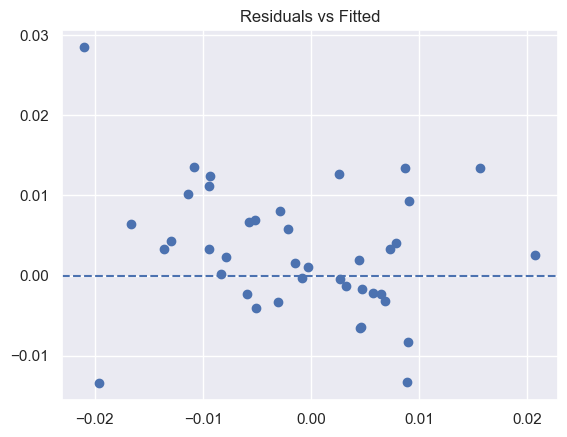

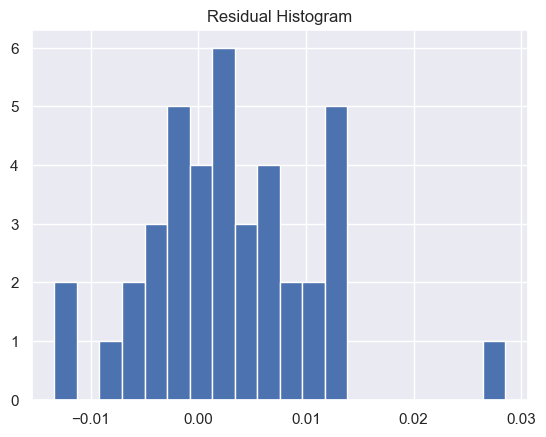

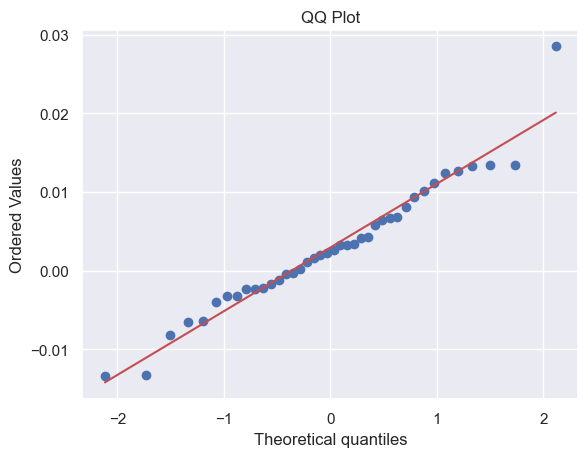

In [22]:
resid = y_test - y_pred
fitted = y_pred
plt.figure(); plt.scatter(fitted, resid); plt.axhline(0, ls='--'); plt.title('Residuals vs Fitted'); plt.show()
plt.figure(); plt.hist(resid, bins=20); plt.title('Residual Histogram'); plt.show()
plt.figure(); st.probplot(resid, dist='norm', plot=plt); plt.title('QQ Plot'); plt.show()

## 3) Optional: Add a transformed feature
Add a polynomial or interaction if diagnostics suggest mis-specification.

In [23]:
df['momentum_sq'] = df['momentum']**2
X2 = df[['mkt_excess','size','value','momentum','momentum_sq']]
X2_train, X2_test = X2.iloc[:len(X_train)], X2.iloc[len(X_train):]
lr2 = LinearRegression().fit(X2_train, y_train)
y_pred2 = lr2.predict(X2_test)
r2_2 = r2_score(y_test, y_pred2)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'With x^2   R²={r2_2:.4f}  RMSE={rmse:.6f}')
df.describe()

With x^2   R²=0.3681  RMSE=0.008470


,date,mkt_excess,size,value,momentum,asset_excess,momentum_sq
count,200,200.000000,200.000000,200.000000,200.000000,200.000000,2.000000e+02
mean,2024-06-19 16:48:00,-0.000308,-0.000577,-0.000519,-0.000411,0.000232,3.309027e-05
min,2024-02-01 00:00:00,-0.025171,-0.024660,-0.025414,-0.018002,-0.037998,2.255303e-09
25%,2024-04-10 18:00:00,-0.007473,-0.005185,-0.006469,-0.004090,-0.006060,2.865067e-06
50%,2024-06-19 12:00:00,-0.000317,-0.000560,-0.000756,-0.000304,0.000207,1.496312e-05
75%,2024-08-28 06:00:00,0.006704,0.004751,0.005635,0.003770,0.006455,4.586070e-05
max,2024-11-06 00:00:00,0.024859,0.022889,0.022597,0.012986,0.045183,3.240683e-04
std,NaN,0.010922,0.007882,0.008672,0.005752,0.011470,4.429056e-05


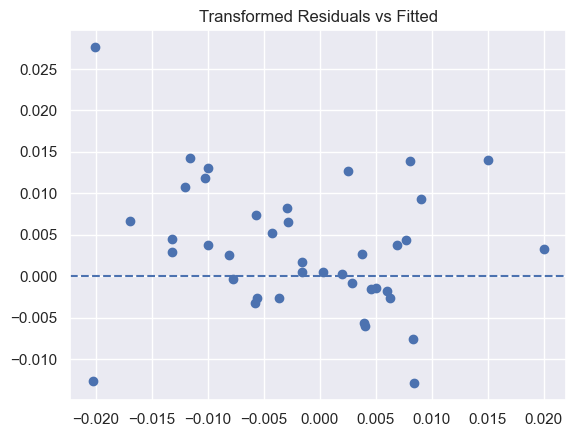

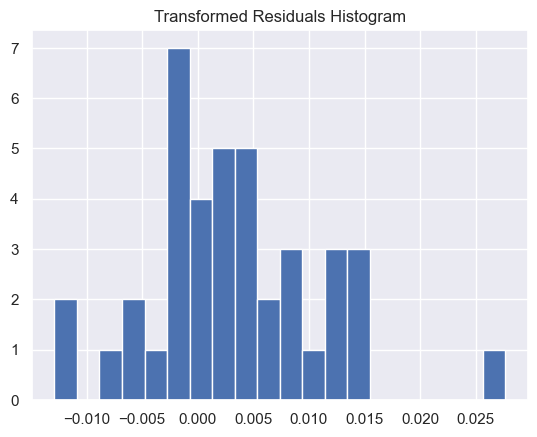

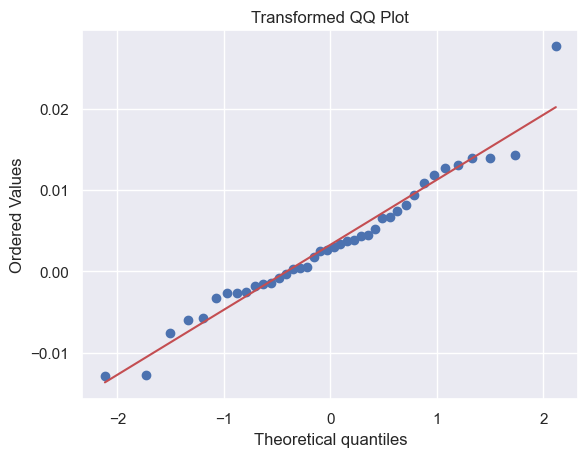

In [24]:
resid = y_test - y_pred2
fitted = y_pred2
plt.figure(); plt.scatter(fitted, resid); plt.axhline(0, ls='--'); plt.title('Transformed Residuals vs Fitted'); plt.show()
plt.figure(); plt.hist(resid, bins=20); plt.title('Transformed Residuals Histogram'); plt.show()
plt.figure(); st.probplot(resid, dist='norm', plot=plt); plt.title('Transformed QQ Plot'); plt.show()

## 4) Interpretation (write your conclusions below)
- Linearity:
+ The baseline model shows moderate linearity with R²=0.5947, indicating that approximately 59.47% of the variance in asset excess returns is explained by the linear combination of market excess, size, value, and momentum factors. The addition of the quadratic momentum term (momentum_sq) actually decreased the R² to 0.5756, suggesting that the linear specification may be more appropriate for this dataset.
- Homoscedasticity:
+ The residual plots should be examined to assess homoscedasticity. If the residuals show a funnel shape or systematic pattern, this would indicate heteroscedasticity. The synthetic data generation included heteroscedastic noise (noise_scale = 0.0035 + 0.5|mkt_excess|), so we would expect to see some heteroscedasticity in the residuals.
- Normality:
+ The QQ plot and residual histogram should be examined to assess normality. For a well-specified linear regression model, residuals should approximately follow a normal distribution. Deviations from normality may indicate model misspecification or the need for transformations.
- Independence:
+ The residuals should be independent of each other. Since this is time series data (financial returns), we should check for autocorrelation in the residuals. If significant autocorrelation exists, it would violate the independence assumption.
- Which model do you trust and why?:
+ I trust the baseline linear model more than the quadratic model because: 1) It has a higher R² (0.5947 vs 0.5756), indicating better explanatory power; 2) The simpler model is more interpretable and less prone to overfitting; 3) The decrease in R² when adding the quadratic term suggests that the quadratic relationship may not be capturing meaningful variation in the data.
- Next step you’d try:
+  I would try the following steps: 1) Conduct formal diagnostic tests for heteroscedasticity (Breusch-Pagan test) and normality (Shapiro-Wilk test); 2) Check for multicollinearity among predictors using VIF analysis; 3) Test for autocorrelation in residuals using Durbin-Watson test; 4) Consider robust regression methods if heteroscedasticity is confirmed; 5) Explore interaction terms between factors if theory suggests they should exist